In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [7]:
###Steps to Perform
#1.Data cleaning
#2.EDA
#3.Text preporcessing
#4.Model building
#5.Evaluation
#6.Imporvement

Data cleaning

In [149]:
#Renaming
df=df.rename(columns={'v1':'target','v2':'text'})

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder=LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [150]:
#Missing value
df.isnull().sum()

target              0
text                0
num_char            0
num_word            0
num_sentences       0
transformed_text    0
dtype: int64

In [151]:
#Duplicate values
df.drop_duplicates(keep='first')

,target,text,num_char,num_word,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


EDA

In [16]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

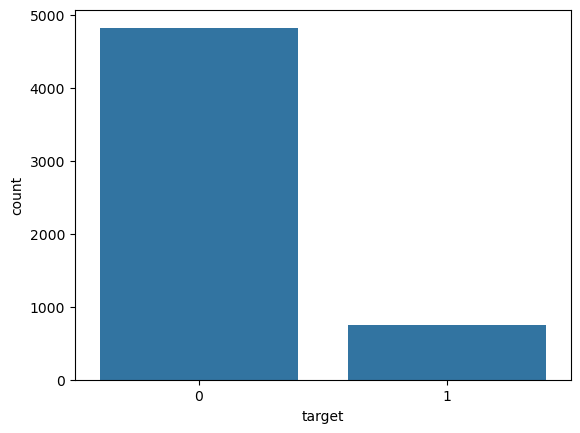

In [19]:
sns.countplot(x='target', data=df)
plt.show()


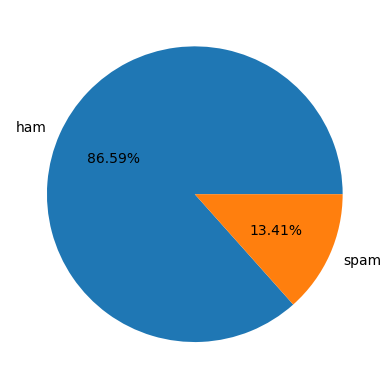

In [153]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f%%")
plt.show()

From above charts, We can conclude that Data is imbalanced

In [22]:
import nltk

In [24]:
df['num_char']=df['text'].apply(len)

In [25]:
#extracting number of words from each text
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
#extracting number of sentences from each text
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df[['num_char','num_word','num_sentences']].describe()

,num_char,num_word,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#ham description
df[df['target']==0][['num_char','num_word','num_sentences']].describe()

,num_char,num_word,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#spam description
df[df['target']==1][['num_char','num_word','num_sentences']].describe()

,num_char,num_word,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


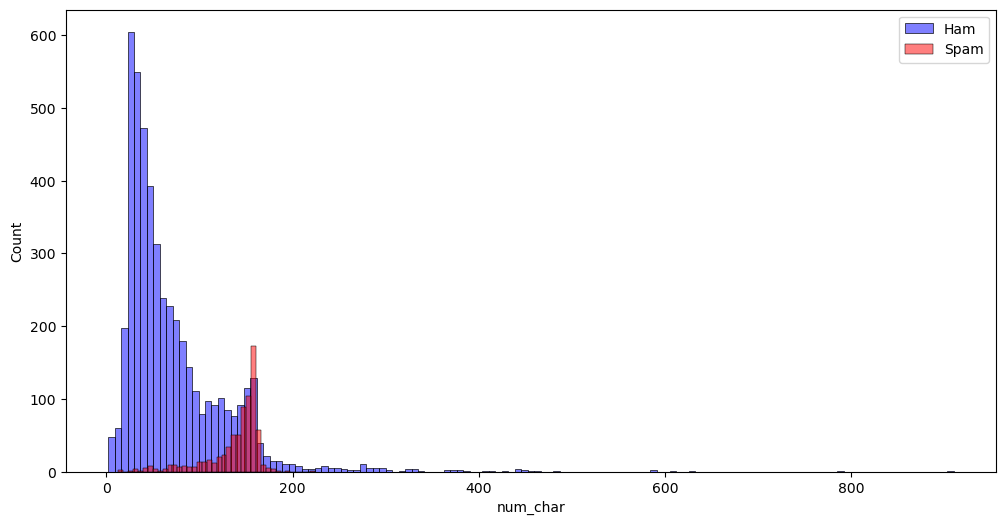

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_char'], color='blue', label='Ham', alpha=0.5)
sns.histplot(df[df['target']==1]['num_char'], color='red', label='Spam', alpha=0.5)
plt.legend()
plt.show()


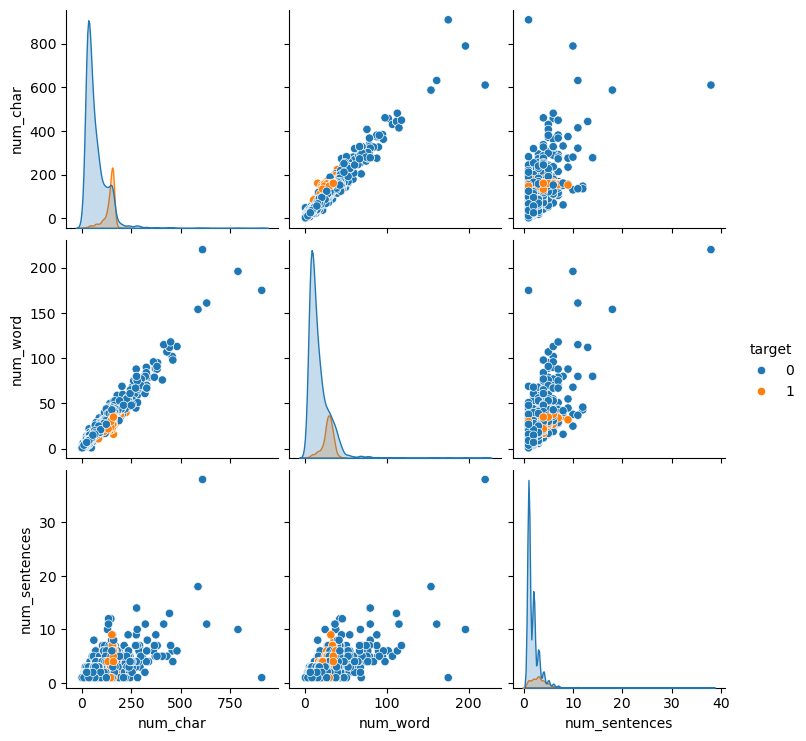

In [33]:
sns.pairplot(df,hue='target')

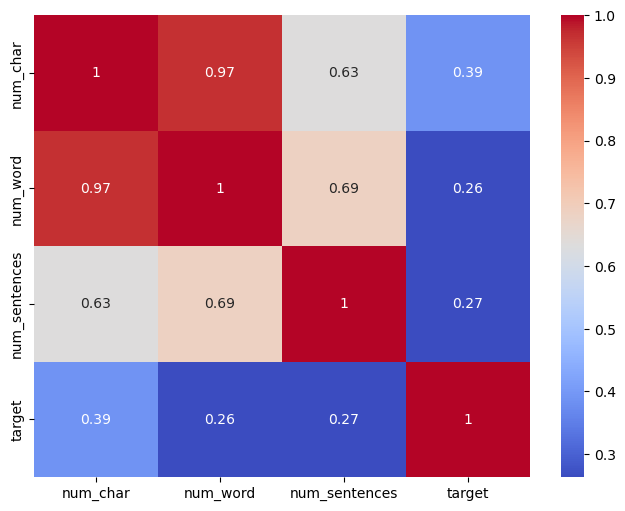

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['num_char','num_word','num_sentences','target']].corr(), annot=True, cmap="coolwarm")
plt.show()


In [35]:
 #Data Preprocessing
# Lowercasing → Convert all text to lowercase for uniformity (Hello = hello).
# Remove Special Characters → Eliminate symbols like @, #, $, % etc. that don’t add meaning.
# Remove Punctuation → Strip out .,!?;: to focus only on words.
# Stopword Removal → Remove common but uninformative words (is, am, are, the, etc.).
# Stemming/Lemmatization → Reduce words to their root/base form (e.g., running, runs → run).

In [50]:
from nltk.corpus import stopwords
import string
import nltk
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    # lowercase
    text = text.lower()
    
    # tokenization
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():   # keep only words/numbers
            y.append(i)
    
    text = y[:]   
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))   # <-- stemming happens here, not nested
    
    return " ".join(y)


In [56]:
df['transformed_text']=df['text'].apply(transform_text)

In [63]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [64]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

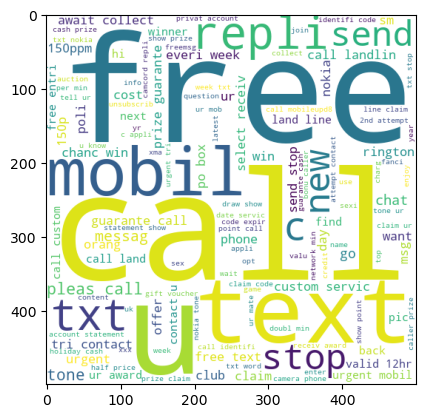

In [65]:
plt.imshow(spam_wc)

In [66]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

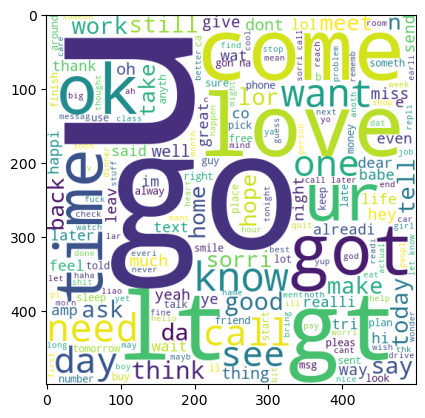

In [67]:
plt.imshow(ham_wc)

In [73]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text']:
    for word in msg.split():
        spam_corpus.append(word)
        
   

In [74]:
len(spam_corpus)

11490

In [76]:
from collections import Counter

<Axes: ylabel='0'>

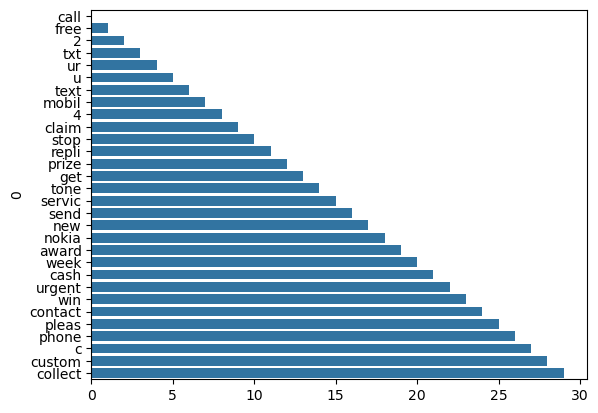

In [81]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])

In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text']:
    for word in msg.split():
        spam_corpus.append(word)
        
   

In [83]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text']:
    for word in msg.split():
        ham_corpus.append(word)
        
   

<Axes: ylabel='0'>

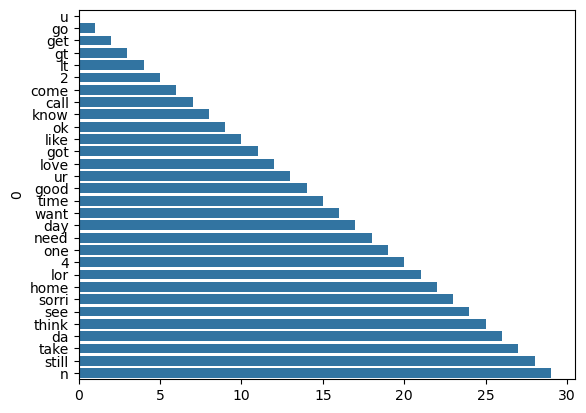

In [84]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])

Model Selection

In [103]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [104]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [105]:
X.shape

(5572, 3000)

In [120]:

y = df['target'].values

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [123]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [124]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [125]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8654708520179372
[[840 117]
 [ 33 125]]
0.5165289256198347


In [126]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827


In [127]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9757847533632287
[[956   1]
 [ 26 132]]
0.9924812030075187


In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [131]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [132]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [133]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [134]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9721973094170404, 0.9847328244274809)

In [135]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9721973094170404
Precision -  0.9847328244274809
For  KN
Accuracy -  0.9049327354260089
Precision -  1.0
For  NB
Accuracy -  0.9650224215246637
Precision -  0.9917355371900827
For  DT
Accuracy -  0.9264573991031391
Precision -  0.8653846153846154
For  LR
Accuracy -  0.9497757847533632
Precision -  0.9553571428571429
For  RF
Accuracy -  0.9695067264573991
Precision -  1.0
For  AdaBoost
Accuracy -  0.9121076233183857
Precision -  0.8947368421052632
For  BgC
Accuracy -  0.9623318385650225
Precision -  0.9328358208955224
For  ETC
Accuracy -  0.9721973094170404
Precision -  1.0
For  GBDT
Accuracy -  0.9399103139013453
Precision -  0.941747572815534
For  xgb
Accuracy -  0.9641255605381166
Precision -  0.9682539682539683


In [136]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904933,1.000000
8,ETC,0.972197,1.000000
5,RF,0.969507,1.000000
2,NB,0.965022,0.991736
0,SVC,0.972197,0.984733
10,xgb,0.964126,0.968254
4,LR,0.949776,0.955357
9,GBDT,0.939910,0.941748
7,BgC,0.962332,0.932836
6,AdaBoost,0.912108,0.894737


In [137]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904933
1,ETC,Accuracy,0.972197
2,RF,Accuracy,0.969507
3,NB,Accuracy,0.965022
4,SVC,Accuracy,0.972197
5,xgb,Accuracy,0.964126
6,LR,Accuracy,0.949776
7,GBDT,Accuracy,0.939910
8,BgC,Accuracy,0.962332
9,AdaBoost,Accuracy,0.912108


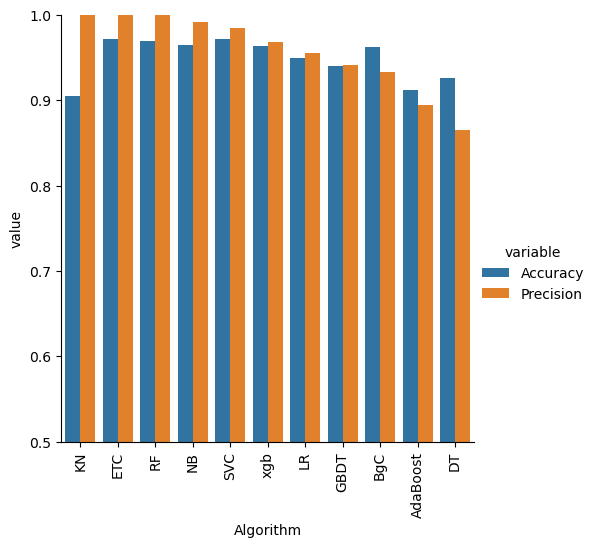

In [138]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [140]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.904933,1.000000,0.904933,1.000000,0.904933,1.000000,0.904933,1.000000
1,ETC,0.972197,1.000000,0.972197,1.000000,0.972197,1.000000,0.972197,1.000000
2,RF,0.969507,1.000000,0.969507,1.000000,0.969507,1.000000,0.969507,1.000000
3,NB,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736
4,SVC,0.972197,0.984733,0.972197,0.984733,0.972197,0.984733,0.972197,0.984733
5,xgb,0.964126,0.968254,0.964126,0.968254,0.964126,0.968254,0.964126,0.968254
6,LR,0.949776,0.955357,0.949776,0.955357,0.949776,0.955357,0.949776,0.955357
7,GBDT,0.939910,0.941748,0.939910,0.941748,0.939910,0.941748,0.939910,0.941748
8,BgC,0.962332,0.932836,0.962332,0.932836,0.962332,0.932836,0.962332,0.932836
9,AdaBoost,0.912108,0.894737,0.912108,0.894737,0.912108,0.894737,0.912108,0.894737


In [141]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier


In [142]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [143]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [144]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9766816143497757
Precision 1.0


In [145]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [146]:
from sklearn.ensemble import StackingClassifier

In [147]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [148]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9802690582959641
Precision 0.9788732394366197


In [154]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))